# Week 6

Multi layered perceptron

In [17]:
# bring in tensorflow and numpy
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.fashion_mnist

In [18]:
# Break apart the data, to have stuff to test against the training
(x_train, y_train), (x_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [19]:
# we need to flatten everything
x_train_flat = np.vstack([img.reshape(-1,) for img in x_train])
x_test_flat = np.vstack([img.reshape(-1,) for img in x_test])

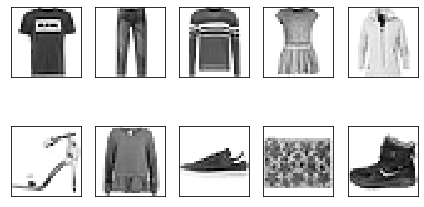

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5,
                       sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = x_train_flat[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_yticks([])
ax[0].set_xticks([])
plt.tight_layout()
plt.show()

In [21]:
import matplotlib.pyplot as plt

In [22]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)

y_train_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [23]:
from tensorflow import keras
model = keras.models.Sequential()

model.add(keras.layers.Dense(
    units=50,
    input_dim=x_train_flat.shape[1],
    activation='sigmoid'
))

model.add(keras.layers.Dense(
    units=50,
    input_dim=50,
    activation='sigmoid'
))

model.add(keras.layers.Dense(
    units=y_train_onehot.shape[1],
    input_dim=50,
    activation='softmax'
))

sgd_optimizer = keras.optimizers.SGD(
    lr=0.001,
    decay=1e-7,
    momentum=0.9
)

model.compile(
    optimizer=sgd_optimizer,
    loss='categorical_crossentropy'
)

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(
    x_train_flat, y_train_onehot,
    batch_size=64, epochs=50,
    verbose=1, validation_split=0.1
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 3s 52us/sample - loss: 1.8779 - val_loss: 1.5671
Epoch 2/50
54000/54000 [==============================] - 2s 35us/sample - loss: 1.3544 - val_loss: 1.1756
Epoch 3/50
54000/54000 [==============================] - 2s 36us/sample - loss: 1.0605 - val_loss: 0.9610
Epoch 4/50
54000/54000 [==============================] - 2s 35us/sample - loss: 0.8997 - val_loss: 0.8499
Epoch 5/50
54000/54000 [==============================] - 2s 35us/sample - loss: 0.8086 - val_loss: 0.7698
Epoch 6/50
54000/54000 [==============================] - 2s 36us/sample - loss: 0.7468 - val_loss: 0.7321
Epoch 7/50
54000/54000 [==============================] - 2s 37us/sample - loss: 0.7106 - val_loss: 0.6913
Epoch 8/50
54000/54000 [==============================] - 2s 35us/sample - loss: 0.6814 - val_loss: 0.6540
Epoch 9/50
54000/54000 [==============================] - 2s 35us/sample - loss: 0.6447 - val_l

In [26]:
history.history

{'loss': [1.877949118260984,
  1.354422132315459,
  1.060485822642291,
  0.8996909191873339,
  0.8086342457841944,
  0.746838649838059,
  0.710575798953021,
  0.6814292551499826,
  0.6447253705130683,
  0.6365183425832678,
  0.6175187086352596,
  0.6091461736891005,
  0.5944148846202426,
  0.592583433592761,
  0.5811555780834622,
  0.5960237065774423,
  0.5769117452126962,
  0.5693667435292844,
  0.5642221862739987,
  0.5677100671838831,
  0.5587401326144183,
  0.5744425519837274,
  0.5676657938604002,
  0.5703111545244852,
  0.5616303122308519,
  0.5776958350428828,
  0.5624221982426113,
  0.5646566995338157,
  0.5598734794016238,
  0.5581439019662363,
  0.5543130630563806,
  0.5669818936100712,
  0.5557404253041303,
  0.5535959400777464,
  0.5616433526145087,
  0.546770247609527,
  0.5474100994357356,
  0.5633394388622708,
  0.5567875932234305,
  0.5561230240397983,
  0.5575339131885104,
  0.5621936210879573,
  0.5479054322242737,
  0.5598866544476262,
  0.5678066023279119,
  0.55129

In [27]:
y_train_pred = model.predict_classes(x_train_flat, verbose=0)
correct_preds = np.sum(y_test == y_train_pred, axis=0)
test_acc = correct_preds / y_test.shape[0]

y_test_pred = model.predict_classes(x_test_flat, verbose=0)
correct_preds = np.sum(y_test == y_test_pred, axis=0)
test_acc = correct_preds / y_test.shape[0]



print('Test accuracy')
print(test_acc * 100)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


Test accuracy
80.75


In [28]:
# random sample, see how well we do
print(model.predict_classes(x_test_flat[200:224]))
print(y_test[200:224])

[1 0 2 9 2 4 0 7 9 8 4 1 8 4 1 3 1 2 7 4 8 5 3 0]
[1 0 2 9 2 4 0 7 9 8 4 1 8 4 1 3 1 6 7 2 8 5 2 0]


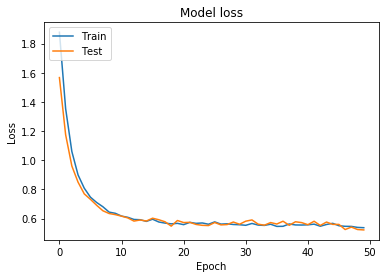

In [30]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()